<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Michelle Avendaño
- Nombre de alumno 2: Claudia Navarro


### **Link de repositorio de GitHub:** `http://....`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
import numpy as np
import pandas as pd

# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')


Mounted at /content/drive


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer



from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import warnings
from tabulate import tabulate
from sklearn.metrics import classification_report, confusion_matrix
import shap
import xgboost as xgb



ImportError: ignored

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lab10/diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?.

In [ ]:
!pip install xgboost

In [ ]:
non_numeric_columns = df.select_dtypes(['number']).columns
for column in non_numeric_columns:
    print(f"Conteo de valores en '{column}':")
    print(tabulate(df[column].value_counts().reset_index(), headers=['Valor', 'Conteo'], tablefmt='pretty'))

Conteo de valores en 'Age':
+----+-------+---------+
|    | Valor | Conteo  |
+----+-------+---------+
| 0  | 10.0  | 10856.0 |
| 1  |  9.0  | 10112.0 |
| 2  |  8.0  | 8603.0  |
| 3  | 11.0  | 8044.0  |
| 4  |  7.0  | 6872.0  |
| 5  | 13.0  | 5426.0  |
| 6  | 12.0  | 5394.0  |
| 7  |  6.0  | 4648.0  |
| 8  |  5.0  | 3520.0  |
| 9  |  4.0  | 2793.0  |
| 10 |  3.0  | 2049.0  |
| 11 |  2.0  | 1396.0  |
| 12 |  1.0  |  979.0  |
+----+-------+---------+
Conteo de valores en 'Sex':
+---+-------+---------+
|   | Valor | Conteo  |
+---+-------+---------+
| 0 |  0.0  | 38386.0 |
| 1 |  1.0  | 32306.0 |
+---+-------+---------+
Conteo de valores en 'HighChol':
+---+-------+---------+
|   | Valor | Conteo  |
+---+-------+---------+
| 0 |  1.0  | 37163.0 |
| 1 |  0.0  | 33529.0 |
+---+-------+---------+
Conteo de valores en 'CholCheck':
+---+-------+---------+
|   | Valor | Conteo  |
+---+-------+---------+
| 0 |  1.0  | 68943.0 |
| 1 |  0.0  | 1749.0  |
+---+-------+---------+
Conteo de valores en

In [ ]:
suma_nulos_por_columna = df.isnull().sum()
tabla_suma_nulos = pd.DataFrame(suma_nulos_por_columna, columns=['Suma de Valores Nulos'])
print(tabulate(tabla_suma_nulos, headers='keys', tablefmt='pretty'))

+----------------------+-----------------------+
|                      | Suma de Valores Nulos |
+----------------------+-----------------------+
|         Age          |           0           |
|         Sex          |           0           |
|       HighChol       |           0           |
|      CholCheck       |           0           |
|         BMI          |           0           |
|        Smoker        |           0           |
| HeartDiseaseorAttack |           0           |
|     PhysActivity     |           0           |
|        Fruits        |           0           |
|       Veggies        |           0           |
|  HvyAlcoholConsump   |           0           |
|       GenHlth        |           0           |
|       MentHlth       |           0           |
|       PhysHlth       |           0           |
|       DiffWalk       |           0           |
|        Stroke        |           0           |
|        HighBP        |           0           |
|       Diabetes    

In [ ]:
# Definir listas de características por tipo
numeric = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Age', 'BMI', 'MentHlth', 'PhysHlth']
categoric = ['DiffWalk', 'Stroke', 'HighBP']
ordinal = ['GenHlth']
not_used = [None]

# Definir el ColumnTransformer para manejar diferentes tipos de características
ct = ColumnTransformer(
    [
        ('One Hot', OneHotEncoder(sparse=False, handle_unknown="ignore", drop='if_binary'), categoric),  # Codificación One-Hot para variables categóricas
        ('Ordinal', OrdinalEncoder(), ordinal),  # Codificación ordinal para variables ordinales
        ('Scaler', MinMaxScaler(), numeric)  # Escalado Min-Max para variables numéricas
    ],
    remainder='passthrough'  # Se pasan las características no especificadas sin transformaciones
)

# Crear un pipeline
XGBoost_clas = Pipeline(steps=[
    ("preprocessing", ct),  # Paso de preprocesamiento utilizando el ColumnTransformer definido anteriormente
    ("model", XGBClassifier())  # Modelo XGBoost para clasificación
])

# Se separan las características (X) de la variable objetivo (y), se reserva 80% de los datos para entrenamiento y 20%test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes', axis=1), df['Diabetes'], test_size=0.2, random_state=42)

# Entrenar modelo con pipeline
XGBoost_clas.fit(X_train,y_train)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['DiffWalk', 'Stroke',
                                                   'HighBP']),
                                                 ('Ordinal', OrdinalEncoder(),
                                                  ['GenHlth']),
                                                 ('Scaler', MinMaxScaler(),
                                                  ['Sex', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# Evaluar el modelo con report y matriz de confusión
y_pred = XGBoost_clas.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Crear una tabla/tabulación con la matriz de confusión usando tabulate
confusion_table = tabulate(cm, headers=['Predicted 0', 'Predicted 1'], showindex=['Real 0', 'Real 1'], tablefmt='pretty')

# Imprimir la tabla de la matriz de confusión
print("Confusion Matrix:")
print(confusion_table)

# Imprimir el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
+--------+-------------+-------------+
|        | Predicted 0 | Predicted 1 |
+--------+-------------+-------------+
| Real 0 |    5012     |    2078     |
| Real 1 |    1473     |    5576     |
+--------+-------------+-------------+
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



Se procedió a realizar la transformación de las columnas según sus tipos de datos: se aplicó el método One-Hot Encoding para las variables categóricas, MinMaxScaler para las numéricas y Ordinal Scaler para las variables ordinales. Estos procesos se llevaron a cabo mediante la creación de un pipeline destinado tanto a la transformación de los datos como al entrenamiento del modelo.

Posteriormente, se empleó un ColumnTransformer para llevar a cabo esta transformación de los datos. Tras el entrenamiento, se calcularon métricas que brindan información sobre la capacidad del modelo para distinguir entre las clases y su rendimiento general. Los resultados mostraron que el modelo logró una precisión promedio del 75%, así como un recall y un puntaje F-1 del mismo valor. Estos números indican un rendimiento que podría mejorarse.

De la matriz de confusión se desprende que en cada clase existe un porcentaje considerable de falsos positivos o negativos. Esto sugiere que el modelo no es muy preciso en este sentido y podría ser mejorado.

Respecto a si estas métricas permiten asegurar que el modelo hace una buena elección de las características, se tiene que no proporcionan información directa sobre qué características son las más importantes o relevantes para la predicción.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

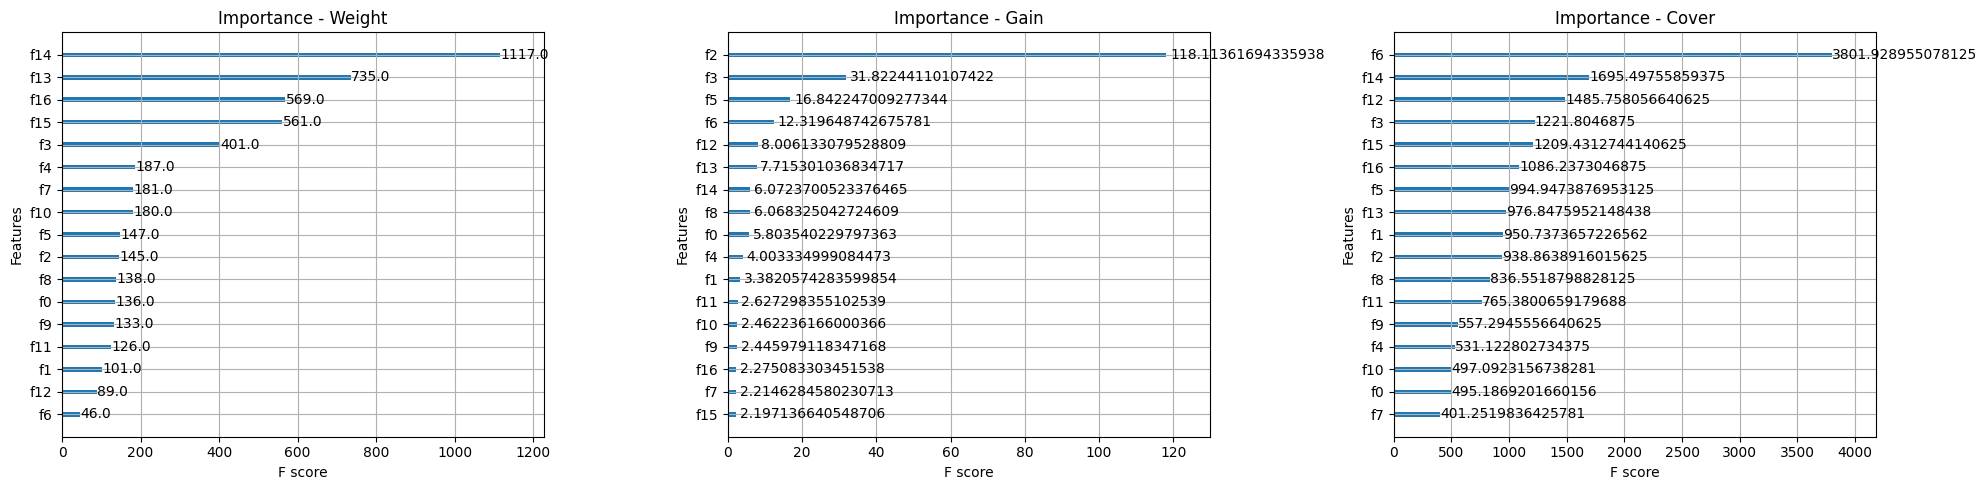

In [ ]:
# Crear una figura con 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Peso
plot_importance(XGBoost_clas['model'], importance_type='weight', title='Importance - Weight', show_values=True, ax=ax[0])
# Graficar la importancia de las características basadas en 'weight' en el primer subplot

# Ganancia
plot_importance(XGBoost_clas['model'], importance_type='gain', title='Importance - Gain', show_values=True, ax=ax[1])
# Graficar la importancia de las características basadas en 'gain' en el segundo subplot

# Cobertura
plot_importance(XGBoost_clas['model'], importance_type='cover', title='Importance - Cover', show_values=True, ax=ax[2])
# Graficar la importancia de las características basadas en 'cover' en el tercer subplot

# Mostrar la figura
plt.tight_layout()
plt.show()
# Ajustar el diseño y mostrar la figura con los subplots


In [ ]:
# Obtener el nombre de cada característica con su número
feature_number = [(i, column) for i, column in enumerate(X_train.columns)]
print(tabulate(feature_number, headers=['Número', 'Nombre de la Característica'], tablefmt='pretty'))

+--------+-----------------------------+
| Número | Nombre de la Característica |
+--------+-----------------------------+
|   0    |             Age             |
|   1    |             Sex             |
|   2    |          HighChol           |
|   3    |          CholCheck          |
|   4    |             BMI             |
|   5    |           Smoker            |
|   6    |    HeartDiseaseorAttack     |
|   7    |        PhysActivity         |
|   8    |           Fruits            |
|   9    |           Veggies           |
|   10   |      HvyAlcoholConsump      |
|   11   |           GenHlth           |
|   12   |          MentHlth           |
|   13   |          PhysHlth           |
|   14   |          DiffWalk           |
|   15   |           Stroke            |
|   16   |           HighBP            |
+--------+-----------------------------+


Según los resultados obtenidos en el análisis de los métodos Weight, Gain y Cover, se identificaron diferentes variables como las más relevantes. La Variable 14 se destacó en Weight (DiffWalk), la 2 en Gain (HighChol) y la 6 en Cover (HeartDiseaseorAttack). Estos hallazgos resaltan la importancia de las variables relacionadas con el historial médico de la persona, como enfermedades cardíacas, niveles elevados de colesterol y dificultades para caminar. Este hallazgo resulta lógico, considerando que la diabetes es una enfermedad que impacta en todo el organismo, lo que sugiere la posible presencia de otras condiciones asociadas en quienes la padecen.

Cada uno de los métodos Weight, Gain y Cover proporciona una perspectiva diferente sobre la relevancia de las características en el modelo:

- Weight se refiere a la frecuencia con la que una característica aparece en los árboles de ensamble, una característica con un alto valor de peso simplemente significa que se ha utilizado más a menudo en los árboles del modelo.
- Gain representa la mejora promedio en la precisión que aporta una característica a los árboles, una característica con un alto valor de ganancia significa que ha contribuido a aumentar significativamente la precisión del modelo.
- Cover indica el promedio de cover de las observaciones de una característica, relacionado con el número de muestras afectadas por su división, una característica con un alto valor de cover significa que ha afectado a un gran número de muestras.

Estos métodos pueden dar importancias variadas a las características dependiendo del objetivo. Por ejemplo, una característica podría tener un alto peso (Weight) al ser utilizada con frecuencia en los árboles, pero su contribución a la mejora de las predicciones (Gain) podría ser baja. De manera similar, una característica podría tener un bajo Weight pero un alto Cover, afectando a un gran número de observaciones cuando se usa. No existe un valor específico que defina una característica como "buena" o "mala" basándose únicamente en Weight, Gain o Cover, ya que estos valores dependen de diferentes factores como la frecuencia de uso, la mejora en la precisión y la cobertura de las muestras, respectivamente.

Este metodo no esta libre de debilidades, por ejemplo, características con numerosas categorías o valores únicos pueden mostrar una importancia inflada. Además, la importancia de las características puede variar con diferentes conjuntos de entrenamiento, volviéndose inestable. A pesar de estas limitaciones, la evaluación de la importancia de las características sigue siendo útil para obtener una visión inicial de qué atributos son relevantes para el modelo.

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

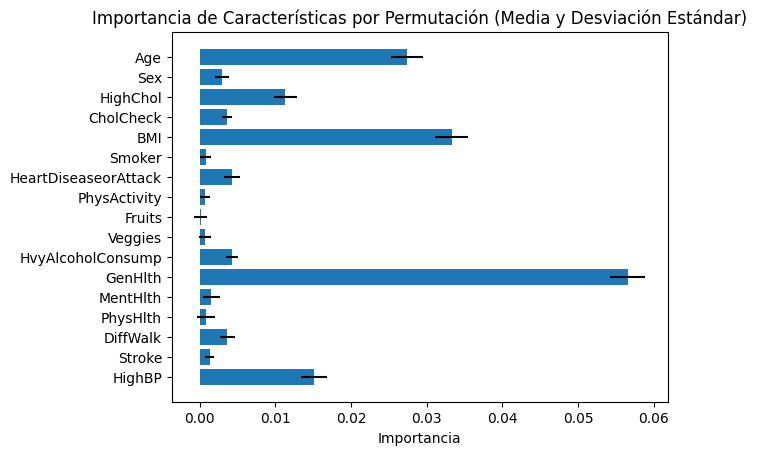

In [ ]:
# Repetir la importancia por permutación 30 veces y almacenar los resultados
all_importances = []
for i in range(30):
    result = permutation_importance(XGBoost_clas, X_test, y_test, n_repeats=10, random_state=i)
    all_importances.append(result.importances)

# Convertir a un array de numpy
all_importances = np.array(all_importances)

# Calcular la media y desviación estándar sobre las 30 ejecuciones para cada característica
importances_mean = all_importances.mean(axis=(0, 2))
importances_std = all_importances.std(axis=(0, 2))

# Obtener los nombres de las características
feature_names = X_test.columns

# Inicializar la figura
fig, ax = plt.subplots()

# Crear un gráfico de barras para las importancias medias con la desviación estándar como barras de error
y_pos = np.arange(len(feature_names))
ax.barh(y_pos, importances_mean, xerr=importances_std, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # las etiquetas se leen de arriba hacia abajo
ax.set_xlabel('Importancia')
ax.set_title('Importancia de Características por Permutación (Media y Desviación Estándar)')

plt.show()


La desviación estándar en este caso revela que la importancia de las variables no es constante. Esta variabilidad se debe al método de permutación, el cual es una técnica de aproximación y la importancia de las características puede experimentar pequeñas variaciones en cada ejecución del método.

La medición de la importancia se hace mediante el método de importancia de la permutación. Se evalúa la relevancia de una característica al permutar aleatoriamente sus valores en el conjunto de datos y cuantificar la disminución en la precisión del modelo como resultado.

Entre las 5 características con mayor impacto son: Edad, BMI, Estado de Salud General (GenHlth), Presión Arterial Alta (HighBP) y Colesterol Alto (HighChol). Estas variables son coherentes, dado que la edad, el índice de masa corporal, la presión arterial y el colesterol elevado son factores de riesgo conocidos para la diabetes. Además, la salud general puede estar vinculada a la diabetes, ya que las personas afectadas por esta condición tienden a tener una salud general más delicada.

En cuanto al cambio con repecto a antes, las características más relevantes son consistentes, aunque el orden de importancia varia. Esta variación se debe a la naturaleza aproximada del método de permutación, que provoca pequeñas alteraciones en la importancia de las características en cada ejecución del proceso.

En cuanto a ventajas:

- Interpretabilidad: Este método es altamente comprensible y fácil de explicar. Evalúa la relevancia de las características al medir la disminución en la precisión del modelo cuando los valores de una característica se permutan aleatoriamente.

- Manejo de características irrelevantes y redundantes: Este enfoque es capaz de identificar características que no aportan a la precisión del modelo. Si al permutar los valores de una característica no se afecta la precisión del modelo, es probable que dicha característica sea irrelevante.


- Generalidad: Puede ser aplicado a cualquier modelo supervisado, a diferencia de otros métodos de evaluación de importancia de características que se restringen a ciertos tipos de modelos.

En cuanto a sesventajas:

- Costo computacional: La evaluación de la importancia mediante permutación puede ser costosa computacionalmente, especialmente en conjuntos de datos con numerosas características, ya que requiere reajustar el modelo para cada una de ellas.

- Correlación entre características: Si dos características están altamente correlacionadas, permutar una de ellas puede no afectar significativamente la precisión del modelo, dado que la otra característica proporciona información similar. Esto puede conducir a una subestimación de la importancia de dichas características.

- Ruido aleatorio: Al basarse en la permutación aleatoria de valores de características, este método puede ser susceptible al ruido aleatorio. Aunque repetir el proceso y obtener un promedio puede ayudar a mitigar este problema, también conlleva un aumento en el costo computacional.




## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
!pip install shap

In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
# Extraer el modelo XGBoost del Pipeline
xgboost_model = XGBoost_clas.named_steps['model']

# Crear un explainer con el modelo XGBoost
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(X_train)

[03:12:56] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [ ]:
print(shap_values)

[[ 0.12965588  0.29184172 -0.5667021  ... -1.117817    0.11969129
   0.08256521]
 [ 0.3862418   0.01048923  0.6180992  ...  2.533242    0.16701303
   1.2637043 ]
 [ 0.26421702  0.0102259  -0.43142164 ...  1.8629485   0.12168944
   1.413856  ]
 ...
 [ 0.05060793 -0.03464023  0.29522842 ... -1.6201394  -0.5328005
   0.16709132]
 [ 0.51724076  0.3427561  -0.7394153  ... -0.67966455  0.0390761
   0.24066724]
 [ 0.53630817  0.38731492 -0.5992868  ... -0.9808606   0.03464561
  -0.03434828]]



Los valores SHAP representan la contribución específica de cada característica a la predicción de un modelo en comparación con la predicción promedio del mismo. Estos valores sirven para interpretar cómo cada característica afecta las predicciones.

Un valor SHAP positivo para una característica señala que esta aumenta la predicción del modelo para esa observación respecto a la predicción promedio. Por el contrario, un valor SHAP negativo indica que la característica reduce la predicción del modelo para esa observación.

La magnitud absoluta de los valores SHAP refleja el impacto de cada característica en la predicción. Asi que aquellas con mayores valores absolutos de SHAP se consideran más relevantes para el modelo en términos predictivos.

Los valores SHAP respetan la propiedad aditiva de los juegos cooperativos. Esto implica que la suma de los valores SHAP de todas las características es igual a la diferencia entre la predicción del modelo para una observación específica y la predicción promedio del modelo.

A diferencia de otros métodos de evaluación de la importancia de características, los valores SHAP capturan las interacciones entre las características. Esta consideración proporciona una visión más completa de la importancia relativa de las características en el modelo.

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

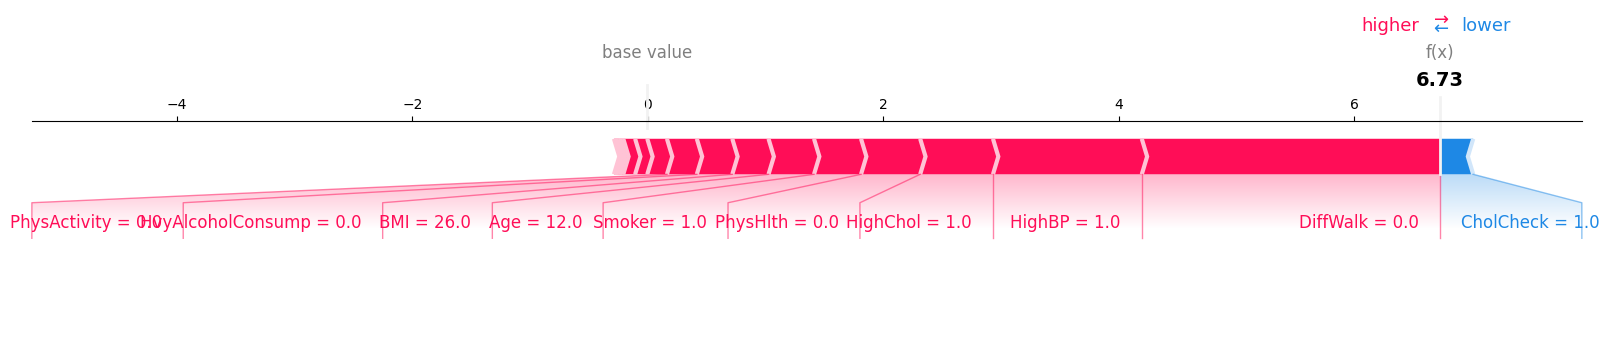

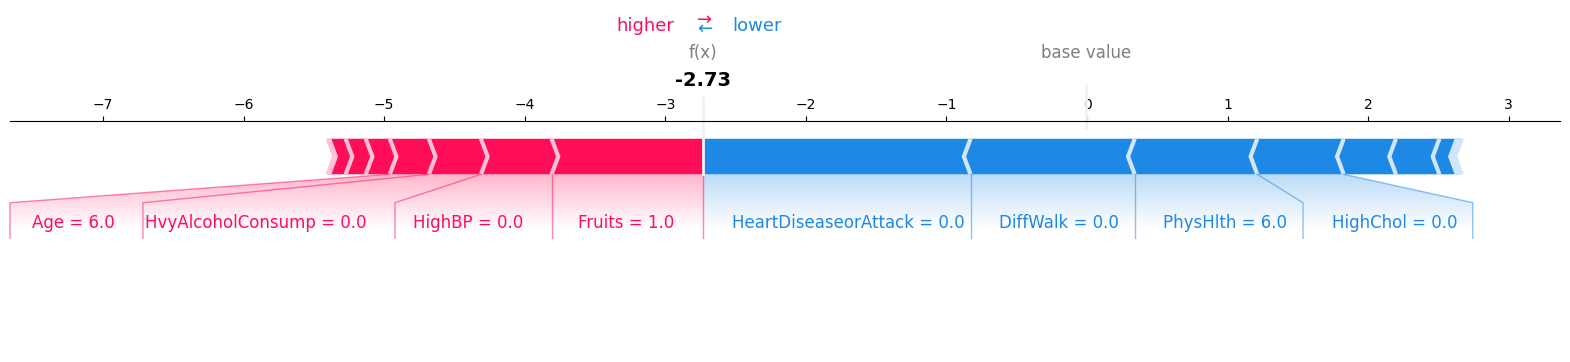

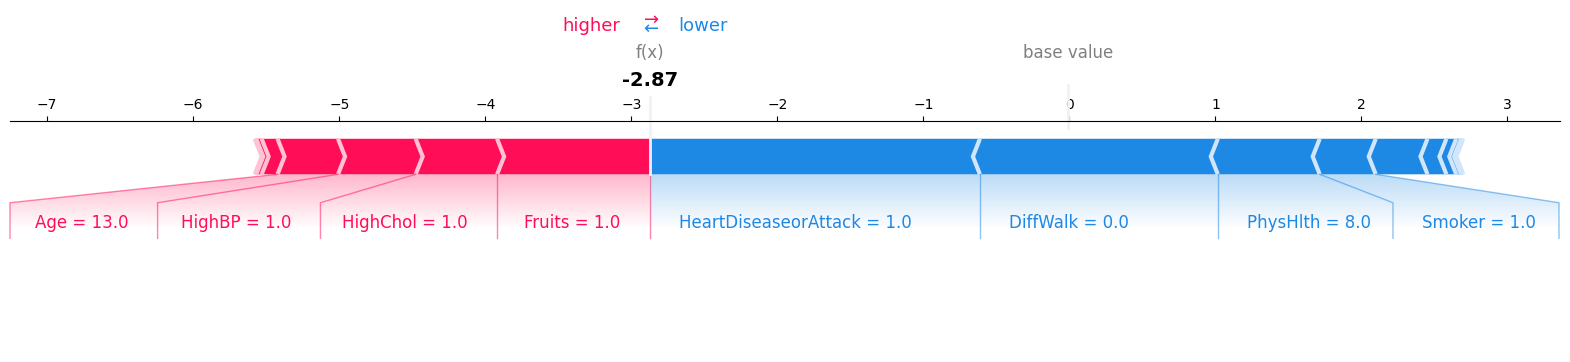

In [ ]:
shap.initjs()
shap_values_df = pd.DataFrame(shap_values, columns=df.drop('Diabetes', axis=1).columns)

# Obtener el aporte de las diferentes variables para las instancias 1, 9 y 150
instances = [1, 9, 150]

for instance in instances:
    shap.force_plot(explainer.expected_value, shap_values[instance], df.drop('Diabetes', axis=1).iloc[instance], matplotlib=True)

Los gráficos muestran la influencia de distintas características en predicciones específicas. En el caso de la diabetes, Fruits afecta positivamente, mientras que el DiffWalk y HeartDiseasorAttack lo hacen de manera negativa. Sin embargo, estas relaciones no son consistentes en todos los casos.

Es importante tener en cuenta que estas 3 instancias individuales no definen un patrón general para los datos. Aunque algunas variables tienen un peso significativo, hay que ser cuidadosos al interpretar los valores SHAP, ya que representan promedios y no se aplican a cada caso particular.

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

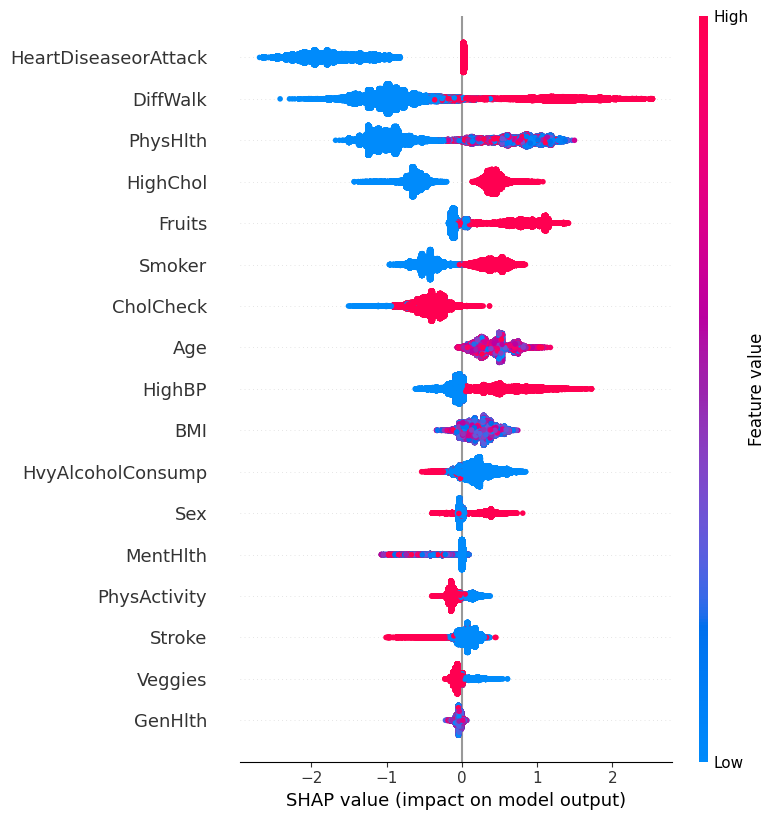

In [ ]:
if shap_values_df.shape[0] != X_train.shape[0]:
    # Ajustar los datos para que tengan el mismo número de filas
    shap_values_df = shap_values_df.iloc[:X_train.shape[0], :]

shap.summary_plot(shap_values_df.values, X_train)

Comparado con las conclusiones generadas a nivel de instancia, ahora se brinda una perspectiva más amplia sobre la importancia de las características en el conjunto de datos en su totalidad, en contraste con el enfoque en casos específicos. Esto permite identificar qué características son generalmente relevantes para el modelo, en lugar de aquellas que son importantes únicamente para casos individuales.

Entonces,  los resultados a nivel global pueden ofrecer una visión más amplia y sólida sobre la importancia de las características de manera generalizable.

En el grafico se observa que las características más relevantes son HeartDisorderAtack, diffwalk, la salud fisica, colesterol alto y frutas. Esto concuerda con los resultados a nivel de instancia, donde tanto el frutas y colesterol demostraron ser importantes para algunas instancias individuales.

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

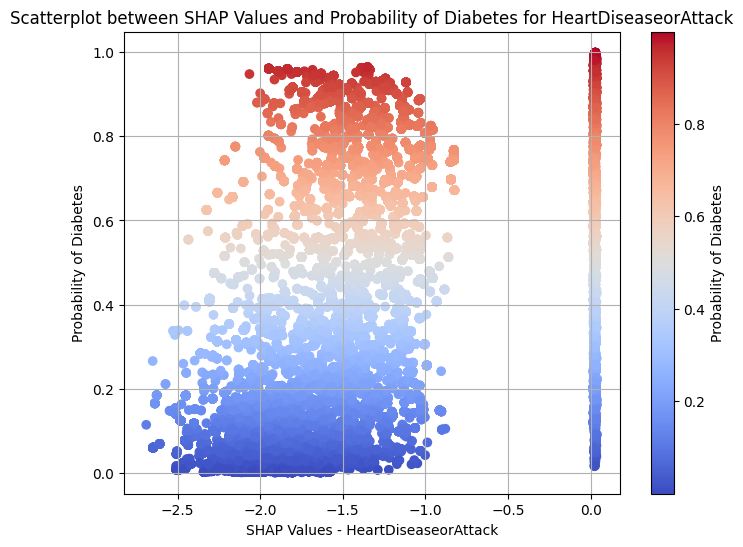

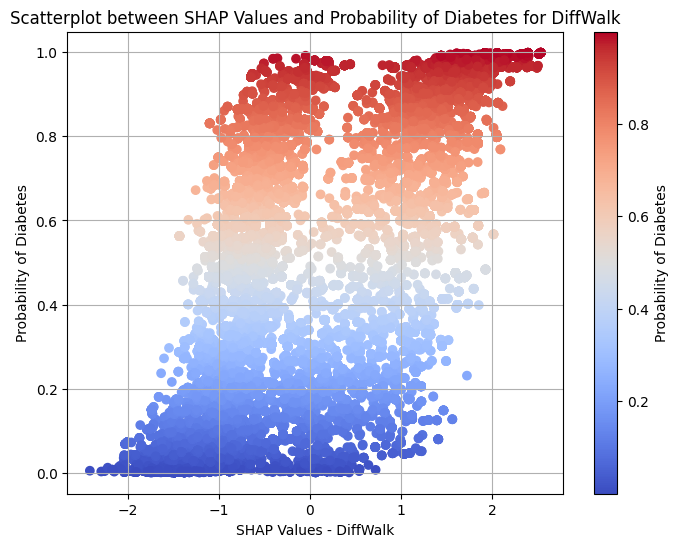

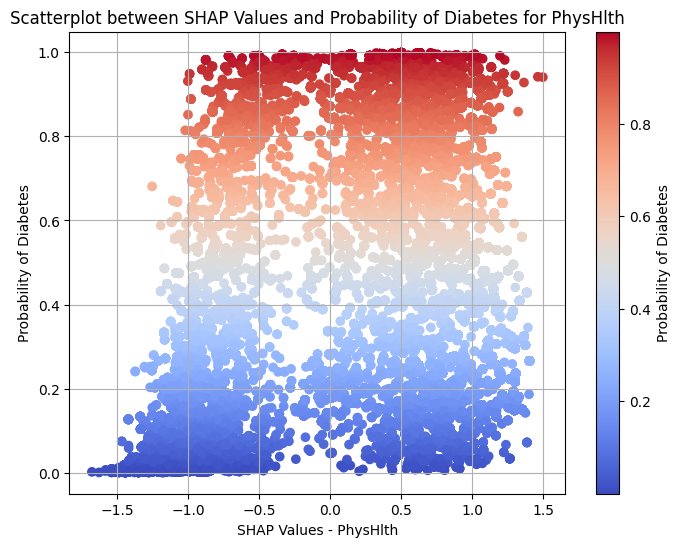

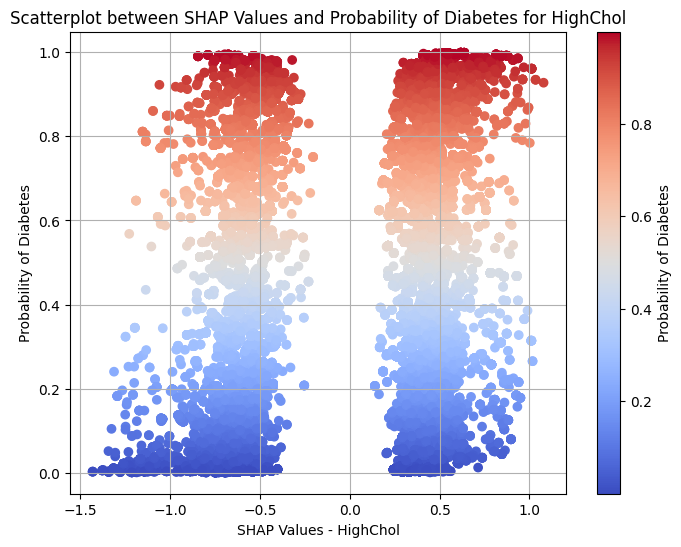

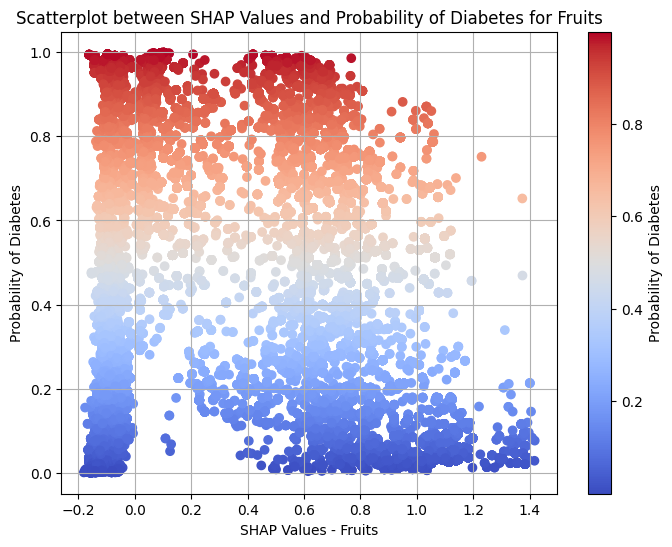

In [ ]:
# Calculamos los valores SHAP absolutos promediados
shap_values_abs_mean = np.mean(np.abs(shap_values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor importancia
feature_importance_names = X_train.columns[np.argsort(shap_values_abs_mean)[::-1]]
#predicciones de probabilidad
probs = xgboost_model.predict_proba(X_train)[:, 1]

# Graficamos scatterplot para las cinco características con mayor importancia según SHAP
for name in feature_importance_names[:5]:
    idx = X_train.columns.get_loc(name)
    shap_feature = shap_values[:, idx]

    # Crear el scatterplot
    plt.figure(figsize=(8, 6))
    plt.scatter(shap_feature, probs, c=probs, cmap='coolwarm')
    plt.colorbar(label='Probability of Diabetes')
    plt.xlabel(f"SHAP Values - {name}")
    plt.ylabel("Probability of Diabetes")
    plt.title(f"Scatterplot between SHAP Values and Probability of Diabetes for {name}")
    plt.grid(True)
    plt.show()


La interpretación de los gráficos revela que las características con una dispersión más amplia de valores SHAP son las que ejercen un mayor impacto a nivel global, como Fruits y la salud fisica. Esta variabilidad señala que dichas características tienen una influencia significativa en las predicciones del modelo, ya que los valores SHAP varían considerablemente entre diferentes observaciones. Además, las distribuciones observadas se alinean con los valores generales de SHAP, donde se destacan  HeartDisorderAtack, diffwalk, la salud fisica, colesterol alto y frutas. Estos datos indican que la probabilidad de padecer diabetes tiende a aumentar con DiffWalk, y a disminuir con Fruits, aun asi, se dificulta el estudio de los graficos dada la distribucion de los puntos.

### 5.5 Partial Dependence Plot (0.4 puntos)


Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

[04:16:10] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


TypeError: ignored

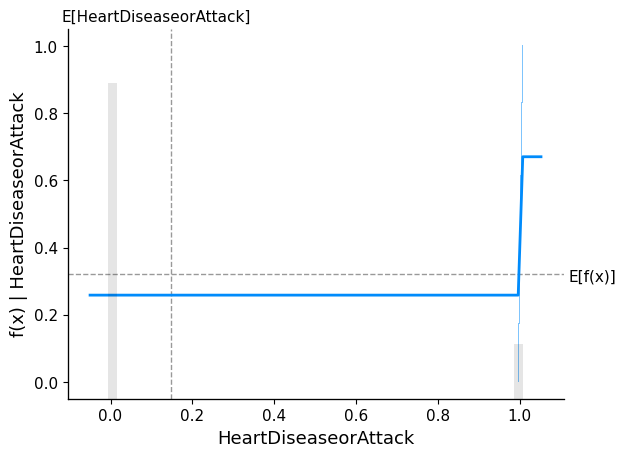

In [ ]:
# Calculate SHAP values
explainer = shap.Explainer(xgboost_model)
shap_values = explainer.shap_values(X_train)

# Get the top 5 important feature names
feature_importance_names = X_train.columns[np.argsort(-np.abs(shap_values).mean(0))][:5]

# Generate Partial Dependence Plots for the top 5 important features
for name in feature_importance_names:
    idx = X_train.columns.get_loc(name)
    shap_values_feature = shap_values[..., idx]
    shap.partial_dependence_plot(
        name, xgboost_model.predict, X_train, model_expected_value=True,
        feature_expected_value=True, ice=True,
        shap_values=shap_values_feature,
        show=True
    )


## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
feature_names = X_train.columns.tolist()
# Inicializar el explainer con los nombres de las características obtenidos
explainer = AnchorTabular(predict_fn, feature_names, seed=1)

# Ahora puedes seguir con el proceso de ajuste del explainer y la generación de explicaciones
explainer.fit(X_train.to_numpy())

explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]

class_names = ["Sin Diabetes", "Con Diabetes"]
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])

idx = 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

idx = 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

idx = 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  Con Diabetes
Prediction:  Con Diabetes
Anchor: HeartDiseaseorAttack > 0.00 AND HighChol > 0.00 AND Smoker > 0.00
Precision: 0.96
Coverage: 0.07
Prediction:  Sin Diabetes
Anchor: PhysHlth <= 0.00 AND HighChol <= 0.00 AND Age <= 7.00
Precision: 0.98
Coverage: 0.13
Prediction:  Sin Diabetes
Anchor: PhysHlth <= 0.00 AND HighBP <= 0.00
Precision: 0.97
Coverage: 0.28


Estas reglas muestran una precisión notable, lo que indica que son predictivas en un alto porcentaje, ya sea para predecir la presencia o ausencia de diabetes en un individuo.

La primera regla establece que si una persona tiene antecedentes de Enfermedad del Corazón o Ataque al Corazón > 0.00, niveles de colesterol > 0.00 y fumador > 0.00 entonces tiene diabetes. Esta regla tiene una precisión del 96%, lo que significa que acierta en el 96% de los casos, y una cobertura del 7%.

La segunda regla indica que si la salud fisica y el nivel de coresterol supera 0.00, y una edad por encima de 7, entonces la persona tiene no diabetes. Esta regla también posee una precisión del 98% y una cobertura del 13%.

Por último, la tercera regla establece que si la salud fisica es igual o superior a 0.00 y HighBP es menor o igual 0.00, entonces la persona no tiene diabetes. Esta regla tiene una precisión del 97% y una cobertura del 28%.

A pesar de que estas reglas no abarcan un porcentaje muy alto del conjunto de datos (7%, 13% y 28%, respectivamente), son relevantes en una variedad decente de situaciones, lo que las convierte en herramientas valiosas para interpretar las predicciones del modelo en diferentes escenarios. A pesar de no cubrir todos los casos, su alta precisión en los segmentos de población que abarcan las hace útiles y confiables para la interpretación del modelo.

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Dependiendo de la perspectiva que busquemos, cada método tiene sus puntos fuertes y limitaciones.

La Importancia de las Características es un método global que ofrece una panorámica sobre qué rasgos son más relevantes para el modelo en su conjunto. Resulta útil para obtener una comprensión general de los aspectos considerados por el modelo al tomar decisiones, pero no revela cómo esas características influyen individualmente en cada predicción.

El método SHAP (SHapley Additive exPlanations) constituye tanto un enfoque local como global. A nivel local, proporciona una explicación detallada de cómo cada característica contribuye a la predicción para una instancia individual, lo cual es valioso para comprender el razonamiento del modelo en casos específicos. A nivel global, brinda una visión general de cómo las características influyen en las predicciones del modelo en general. Los gráficos de dependencia de SHAP y las representaciones de la importancia de las características ofrecen una visión detallada y completa de las decisiones del modelo.

Por otro lado, las Anchor Rules constituyen un método local que ofrece reglas claras y fácilmente interpretables que explican por qué el modelo realizó una predicción específica. Esto resulta especialmente útil para proporcionar explicaciones simples y comprensibles a personas no expertas en el modelo, como los pacientes en este caso.

En la tarea de clasificación de la diabetes, tanto SHAP como las Reglas de Anclaje ofrecen conclusiones detalladas y útiles. SHAP proporciona una visión minuciosa de cómo las características afectan las predicciones tanto a nivel individual como general, mientras que las Reglas de Anclaje ofrecen explicaciones simples y comprensibles para las predicciones individuales.

Respecto a la consulta del Dr. Simi, la elección del método depende del propósito de la explicación. Si el Dr. Simi necesita entender las decisiones del modelo de manera general para mejorar el modelo o para verificar su coherencia con el entendimiento médico de la diabetes, los métodos globales como la Importancia de las Características y SHAP a nivel global serían más útiles. Por otro lado, si el Dr. Simi necesita explicar a un paciente en particular por qué el modelo realizó una predicción específica, entonces los métodos locales como SHAP a nivel individual y las Reglas de Anclaje serían más apropiados, dado que se optimizan las decisiones y predicciones para cada grupo, determinando si tienen diabetes o no. La capacidad de comprender el razonamiento detrás de una predicción puede ayudar a los pacientes a confiar más en el diagnóstico o pronóstico, lo cual es especialmente relevante en el ámbito médico, donde la confianza del paciente puede influir en su abordaje frente a la enfermedad.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>